In [1]:
import pandas as pd

df = pd.read_csv('/content/data.csv')
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [3]:
display(X_train.isnull().sum())

X_train = X_train.drop('Unnamed: 32', axis=1)
X_test = X_test.drop('Unnamed: 32', axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

,0
id,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

y_pred = model.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])

print("Confusion Matrix:")
print(conf_matrix)
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Confusion Matrix:
[[70  1]
 [ 2 41]]

Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
ROC-AUC: 0.9974


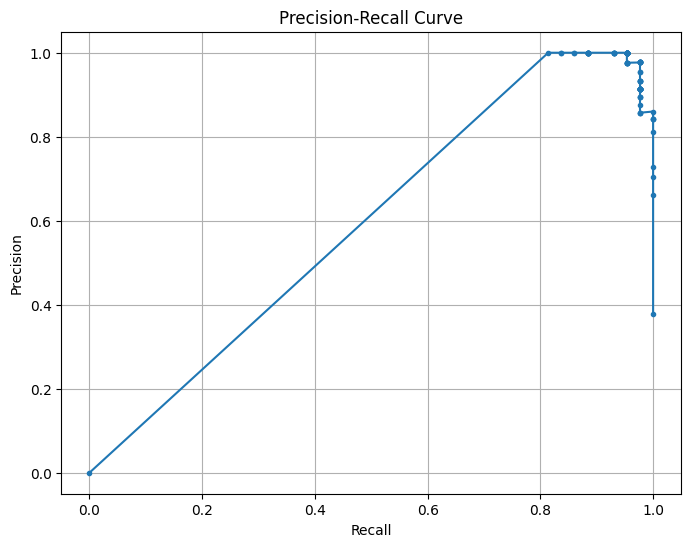


The sigmoid function, also known as the logistic function, is a crucial component of Logistic Regression.
It takes any real-valued number as input and outputs a value between 0 and 1.
The formula is: σ(z) = 1 / (1 + e^(-z)), where z is the linear combination of the features and weights.

In Logistic Regression, the sigmoid function transforms the linear output of the model into a probability.
This probability represents the likelihood that the input belongs to the positive class (in this case, 'M' for malignant).
A probability close to 1 indicates a high likelihood of the positive class, while a probability close to 0 indicates a high likelihood of the negative class ('B' for benign).

The classification threshold is a value between 0 and 1 used to convert the predicted probabilities into class labels.
By default, the threshold is typically set to 0.5.
If the predicted probability is greater than or equal to the threshold, the instance is classified as positive.
If the predicted proba

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score


y_test_int = y_test.apply(lambda x: 1 if x == 'M' else 0)


y_proba = model.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)

precision_scores = []
recall_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    precision = precision_score(y_test_int, y_pred_threshold, pos_label=1, zero_division=0)
    recall = recall_score(y_test_int, y_pred_threshold, pos_label=1)
    precision_scores.append(precision)
    recall_scores.append(recall)


plt.figure(figsize=(8, 6))
plt.plot(recall_scores, precision_scores, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


print("""
The sigmoid function, also known as the logistic function, is a crucial component of Logistic Regression.
It takes any real-valued number as input and outputs a value between 0 and 1.
The formula is: σ(z) = 1 / (1 + e^(-z)), where z is the linear combination of the features and weights.

In Logistic Regression, the sigmoid function transforms the linear output of the model into a probability.
This probability represents the likelihood that the input belongs to the positive class (in this case, 'M' for malignant).
A probability close to 1 indicates a high likelihood of the positive class, while a probability close to 0 indicates a high likelihood of the negative class ('B' for benign).

The classification threshold is a value between 0 and 1 used to convert the predicted probabilities into class labels.
By default, the threshold is typically set to 0.5.
If the predicted probability is greater than or equal to the threshold, the instance is classified as positive.
If the predicted probability is less than the threshold, the instance is classified as negative.

Tuning the threshold allows us to adjust the trade-off between precision and recall.
- Increasing the threshold (closer to 1) makes the model more conservative in predicting the positive class. This generally leads to higher precision (fewer false positives) but lower recall (more false negatives).
- Decreasing the threshold (closer to 0) makes the model more aggressive in predicting the positive class. This generally leads to higher recall (fewer false negatives) but lower precision (more false positives).

The precision-recall curve plotted above visualizes this trade-off, showing how precision and recall change as the threshold varies. By examining this curve, we can select a threshold that balances precision and recall according to the specific needs of the application.
""")

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded and preprocessed, including handling missing values in the 'Unnamed: 32' column by dropping it.
*   The data was split into training and testing sets and features were standardized using `StandardScaler`.
*   A Logistic Regression model was trained on the scaled training data.
*   The model achieved an accuracy of 0.9737 on the test set.
*   The precision for the positive class ('M') was 0.9762 and the recall was 0.9535.
*   The ROC-AUC score was 0.9974, indicating strong discriminatory power.
*   The confusion matrix showed only 1 false positive and 2 false negatives.
*   The precision-recall curve was generated to visualize the trade-off between precision and recall across different classification thresholds.

### Insights or Next Steps

*   The Logistic Regression model performed exceptionally well based on the evaluation metrics.
*   Further analysis could involve exploring the features that contribute most significantly to the model's predictions.
